# Student Loan Risk with Deep Learning

In [78]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [79]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [80]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [81]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [82]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"].values

# Display a sample of y
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [83]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns="credit_ranking").values


# Review the features DataFrame
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

### Step 3: Split the features and target sets into training and testing datasets.


In [84]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Review the number of samples in the training and testing datasets 
len(X_train), len(X_test)


(1199, 400)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [85]:
# Create a StandardScaler instance
scaler = StandardScaler()


# Fit the scaler to the features training dataset
scaler.fit(X_train)


# Fit the scaler to the features training dataset
X_train_scaled = scaler.transform(X_train)
# Transform the testing data using the scaler model
X_test_scaled = scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [86]:
# Define the the number of inputs (features) to the model
number_input_features = X_train.shape[1]

# Review the number of features
number_input_features


11

In [87]:
# Define the number of hidden nodes for the first hidden layer
number_hidden_nodes_layer1 = 8

# Define the number of hidden nodes for the second hidden layer
number_hidden_nodes_layer2 = 4

# Define the number of neurons in the output layer
number_output_neurons = 1


In [88]:
# Create the Sequential model instance
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=number_hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Add the second hidden layer
model.add(Dense(units=number_hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(units=number_output_neurons, activation="sigmoid"))


c:\Users\Mike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Display the Sequential model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [90]:
# Compile the Sequential model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [91]:
# Fit the model using 50 epochs and the training data
model.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3952 - loss: 0.8098   
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4143 - loss: 0.7484 
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4518 - loss: 0.7150 
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5246 - loss: 0.6933 
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5828 - loss: 0.6860 
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6229 - loss: 0.6680 
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6414 - loss: 0.6517 
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6755 - loss: 0.6303 
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6959 - loss: 0.5986 
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6949 - loss: 0.5905 
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7275 - loss: 0.5595 
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [92]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 10ms/step - accuracy: 0.5000 - loss: 6.0700
Loss: 6.069969654083252, Accuracy: 0.5


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [93]:
# Set the model's file path
model_file_path = Path("student_loans.keras")


# Export your model to a keras file
model.save(model_file_path)


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [94]:
# Set the model's file path
model_file_path = Path("student_loans.keras")

# Load the model to a new object
loaded_model = tf.keras.models.load_model(model_file_path)


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [95]:
# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)

# Display a sample of the predictions
predictions[:5]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.44983056],
       [0.34842196],
       [0.80661154],
       [0.7038594 ],
       [0.98004466]], dtype=float32)

In [96]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame({"Predictions": predictions.flatten()})
predictions_df

,Predictions
0,0.449831
1,0.348422
2,0.806612
3,0.703859
4,0.980045
...,...
395,0.700278
396,0.321506
397,0.917397
398,0.298078


### Step 4: Display a classification report with the y test data and predictions

In [97]:
# Print the classification report with the y test data and predictions
print(classification_report(y_test, predictions_df["Predictions"].round(), target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       188
           1       0.78      0.70      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



PermutationExplainer explainer: 401it [00:28, 10.64it/s]                         
C:\Users\Mike\AppData\Local\Temp\ipykernel_38808\2082114583.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


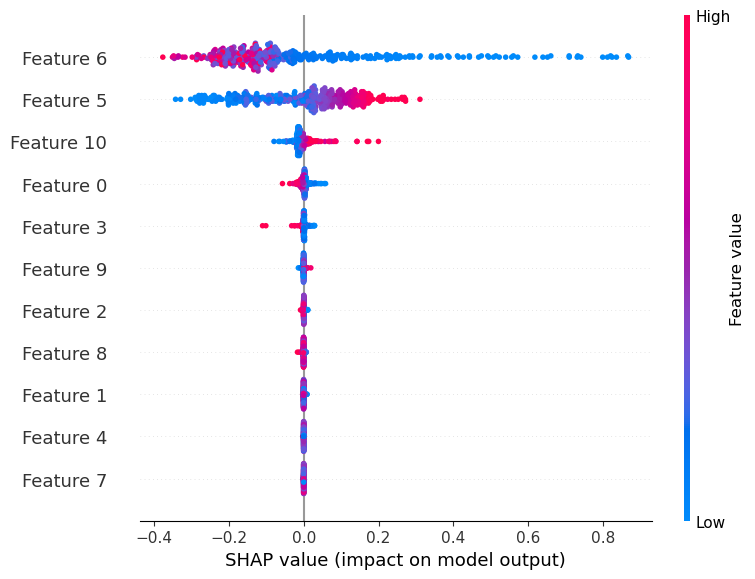

In [101]:
import shap

# Wrap your model for SHAP compatibility
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize the global importance
shap.summary_plot(shap_values, X_test)


In [102]:
from tensorflow.keras.backend import gradients, mean

# Assuming input layer is X_train and target is y_train
def calculate_integrated_gradients(model, X):
    input_tensor = model.input
    output_tensor = model.output
    grad_tensor = gradients(mean(output_tensor), input_tensor)
    return grad_tensor


---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.
- Age: Helps assess repayment maturity and the ability to manage debt over time.
- Income: Indicates repayment capability and financial stability.
- Employment Status: Shows whether the borrower has a reliable income source.
- Desired Loan Amount: Matches loan offers to the borrower’s specific financial need.
- Repayment Duration: Helps tailor loan options to match the borrower's repayment strategy.
- Interest Rate Sensitivity: Determines the borrower’s preference for fixed or variable-rate loans.
- Credit Score: Measures creditworthiness and likelihood of repayment success.
- Past Repayment History: Reflects borrowing behavior and repayment reliability.
- Current Institution: Suggests potential earning capacity and career opportunities post-graduation.
- Field of Study: Estimates future earning potential based on the chosen academic discipline.
- Expected Graduation Date: Aligns loan repayment with the borrower’s academic timeline.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.
Based on the data, the system would use content-based filtering because the recommendations are based on individual student attributes, such as credit score, loan needs, and academic information. This method is suitable as it aligns the loan options to the student’s specific profile, rather than relying on other users’ behaviors (as in collaborative filtering)
3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.
- Data Privacy and Security: Handling sensitive information like credit history and income raises concerns about data breaches and compliance with privacy laws (e.g., GDPR or CCPA). Ensuring robust security protocols is crucial to protect users' data.
- Bias in Recommendations: The system might unintentionally favor certain student groups due to biased training data, potentially leading to discriminatory loan offers. Addressing fairness and inclusivity is vital to maintain equity

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

